## Stroop Experiment

In [1]:
from __future__ import print_function
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

from figures import (
                    univariate, 
                    boolean_bar,
                    qq_plot,
                    qq_plot_var
                    )

from tables import descriptive_table

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

## Get dataset

In [3]:
# Data is stored in data folder within resources folder one level up
os.chdir('..')

file_loc = os.path.join("data", "stroopdata.csv")
df = pd.read_csv(file_loc, sep=',')

df["Difference"] = df["Congruent"] - df["Incongruent"]

df.head(4)

,Congruent,Incongruent,Difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057


## Descriptive Statistics

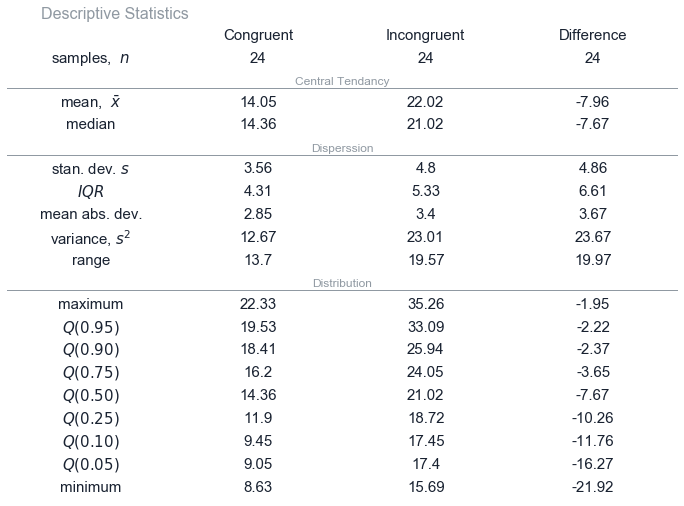

In [5]:
descriptive_table(df[["Congruent", "Incongruent", "Difference"]], 
                  ["Congruent", "Incongruent", "Difference"],
                  fig_size=(12, 8))

In [6]:
# Number of times congruent takes a greater time than incongruent test
(df[df["Congruent"] > df["Incongruent"]]).count()

Congruent      0
Incongruent    0
Difference     0
dtype: int64

## Visualise distribution

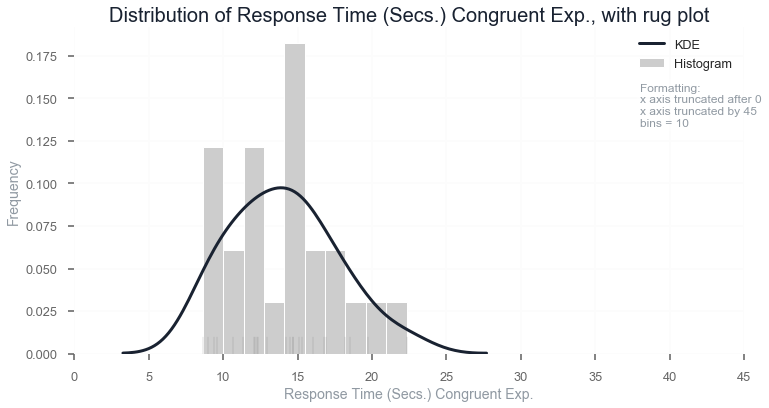

In [7]:
univariate(df["Congruent"], "Response Time (Secs.) Congruent Exp.", bin_n=10, x_truncation_upper=45, x_truncation_lower=0)

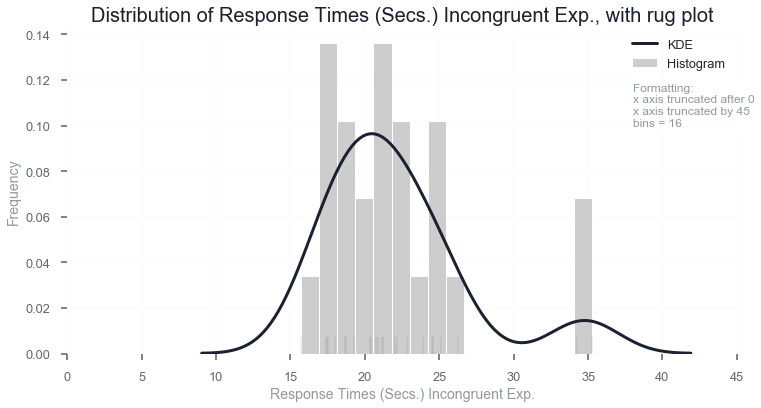

In [8]:
univariate(df["Incongruent"], "Response Times (Secs.) Incongruent Exp.", bin_n=16, x_truncation_upper=45, x_truncation_lower=0)

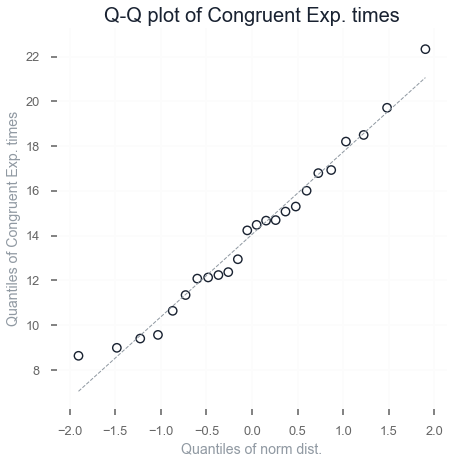

In [9]:
# qq plots should require 1000 samples, we only have 24
qq_plot(df["Congruent"], "Congruent Exp. times", ax_size=(7, 7))

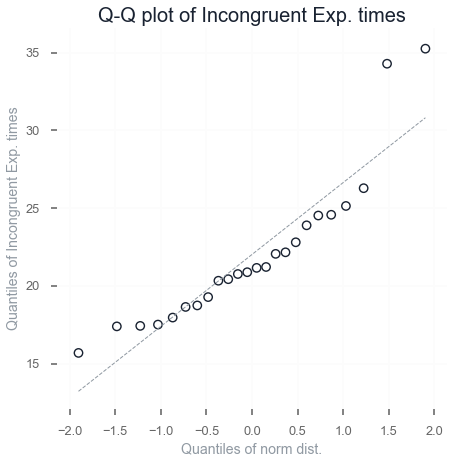

In [10]:
# qq plots should require 1000 samples, we only have 24
qq_plot(df["Incongruent"], "Incongruent Exp. times")

## Statistical testing and results

Perform calculations for T-test, Confidence intervals

### Manual calculations

In [18]:
# Where mu1 is Congruent & mu2 is Incongruent
mu1 = 14.05
mu2 = 22.02
# Standard deviation of the difference
s = 4.86
# Sample size
n = 24
# Degrees of freedom
d_free = (n-1)
# Standard error mean
sem = s/(np.sqrt(n))

print("mean difference", round((mu1-mu2), 3))
print("standard error", round(sem, 3))

# Calculate t
t = (
    (mu1-mu2)
    / sem
    )

print("t is", round(t, 3))

# Read from t table, degrees of freedom is n-1
alpha_05_df23 = 1.714
alpha_025_df23 = 2.069
print("t statistic 0.25", alpha_025_df23)
print("t statistic 0.25", -1*alpha_025_df23)

# Cohen´s d
Coh_d = (mu1-mu2)/s
print("Cohens d", round(Coh_d, 3))

# Margin of error
m_error = alpha_025_df23*(sem)

# Confidence interval
lower_ci = (mu1-mu2)-alpha_025_df23*(sem)
upper_ci = (mu1-mu2)+alpha_025_df23*(sem)

print("Lower confidence interval", round(lower_ci, 3))
print("Upper confidence interval", round(upper_ci, 3))

r2 = (t**2)/((t**2)+d_free)

print("R squared", round(r2, 3))

mean difference -7.97
standard error 0.992
t is -8.034
t statistic 0.25 2.069
t statistic 0.25 -2.069
Cohens d -1.64
Lower confidence interval -10.023
Upper confidence interval -5.917
R squared 0.737


## Scipy

In [20]:
# Get the t statistic for 0.025 with df (n-1)
#
# 0.025 is used for a two sided t-test of 0.05
print("t statistic upper", round(stats.t.ppf(q=0.975, df=23), 4))
print("t statistic lower", round(stats.t.ppf(q=0.025, df=23), 4))

# Two tailed t test using two dependent samples
t, p = stats.ttest_rel(df["Congruent"].copy(), df["Incongruent"].copy())
print("Two dependent samples: t = {0}, p = {1}".format(round(t, 3), round(p, 8)))

# Two tailed t test using 1 sample, expected result in null hypothesis is 0
t, p = stats.ttest_1samp(df["Difference"].copy(), 0)
print("Difference as one sample: t = {0}, p = {1}".format(round(t, 3), round(p, 8)))

# Confidence intervals - Not really sure how this works with loc and scale
# ci = stats.t.interval(0.025, 23, loc=(mu1-mu2), scale=1)
# print ("Confidence interval using scipy ??", ci)

def mean_confidence_interval(data, confidence=0.999):
    """Returns confidence interval.
    
    For two tailed dependent t test"""
    a = 1.0*np.array(data)
    n = len(a)
    # Mean and standard error
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

mean, upper_ci, lower_ci = mean_confidence_interval(df["Difference"])
print ("Confidence interval around mean", round(lower_ci, 3), round(mean, 3), round(upper_ci, 3))

t statistic upper 2.0687
t statistic lower -2.0687
Two dependent samples: t = -8.021, p = 4e-08
Difference as one sample: t = -8.021, p = 4e-08
Confidence interval around mean -4.223 -7.965 -11.706


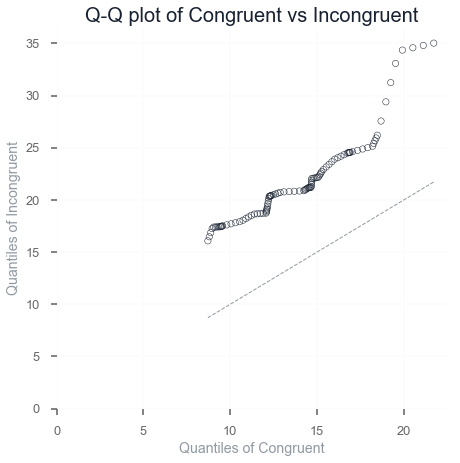

In [20]:
ax = qq_plot_var(df["Congruent"], df["Incongruent"], 
                 "Congruent", "Incongruent", 
                 fit_zero=True)